# 08 Sampling Interfaces and Orientations from Raster

Interfaces can be directly sampled from a digital elevation model or subsurface raster/mesh while orientations have to be sampled from the digital elevation model/raster, the slope for the dipping angle and the aspect for the azimuth.

<img src="../images/tutorial08_cover.png">

## Set File Paths and download Tutorial Data

If you downloaded the latest `GemGIS` version from the Github repository, append the path so that the package can be imported successfully. Otherwise, it is recommended to install `GemGIS` via `pip install gemgis` and import `GemGIS` using `import gemgis as gg`. In addition, the file path to the folder where the data is being stored is set. The tutorial data is downloaded using Pooch (https://www.fatiando.org/pooch/latest/index.html) and stored in the specified folder. Use `pip install pooch` if Pooch is not installed on your system yet.

In [1]:
import gemgis as gg

file_path ='data/08_sampling_interfaces_orientations_from_raster/'

C:\Users\ale93371\Anaconda3\envs\gemgis\lib\site-packages\gemgis\gemgis.py:27: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


In [2]:
gg.download_gemgis_data.download_tutorial_data(filename="08_sampling_interfaces_orientations_from_raster.zip", dirpath=file_path)

## Loading raster data

In [3]:
import rasterio

raster = rasterio.open(file_path + 'raster.tif')

In [4]:
raster.bounds

BoundingBox(left=-4.440892098500626e-16, bottom=1.3642420526593924e-12, right=971.002897605575, top=1068.1031873661339)

## Plotting the raster

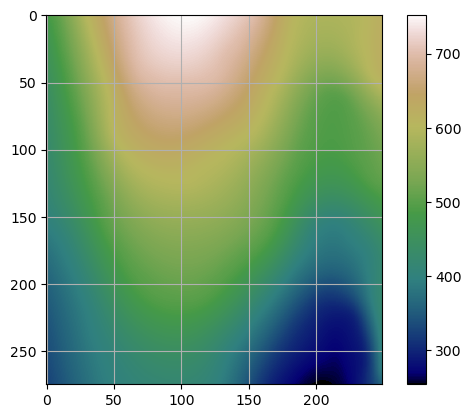

In [5]:
import matplotlib.pyplot as plt

im = plt.imshow(raster.read(1), cmap='gist_earth')
plt.grid()
plt.colorbar(im)

## Sampling Interfaces from Raster

### Sampling by lists

Sampling interfaces from a raster given lists of X and Y coordinates is done using ``sample_interfaces(..)``.

In [6]:
point_x = [100, 200, 300, 400, 500]
point_y = [100, 200, 300, 400, 500]

gdf = gg.raster.sample_interfaces(raster=raster, 
                                  point_x=point_x,
                                  point_y=point_y,
                                  formation='Test',
                                  crs='EPSG:4326')

gdf

,X,Y,Z,geometry,formation
0,100.00,100.00,376.72,POINT (100.00000 100.00000),Test
1,200.00,200.00,435.22,POINT (200.00000 200.00000),Test
2,300.00,300.00,505.29,POINT (300.00000 300.00000),Test
3,400.00,400.00,540.68,POINT (400.00000 400.00000),Test
4,500.00,500.00,561.65,POINT (500.00000 500.00000),Test


### Plotting the data

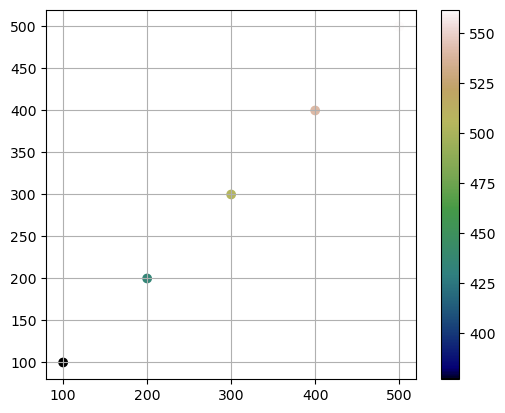

In [7]:
gdf.plot(column='Z', cmap='gist_earth', aspect='equal', legend=True)
plt.grid()

### Sampling by arrays

Sampling interfaces from an array given lists of X and Y coordinates.

In [8]:
point_x = [100, 200, 300, 400 ,500]
point_y = [100, 200, 300, 400 ,500]

gdf = gg.raster.sample_interfaces(raster=raster.read(1), 
                                  point_x=point_x,
                                  point_y=point_y,
                                  extent=[0, 972, 0 ,1069],
                                  formation='Test',
                                  crs='EPSG:4326')

gdf

,X,Y,Z,geometry,formation
0,100.00,100.00,378.80,POINT (100.00000 100.00000),Test
1,200.00,200.00,435.22,POINT (200.00000 200.00000),Test
2,300.00,300.00,505.29,POINT (300.00000 300.00000),Test
3,400.00,400.00,541.74,POINT (400.00000 400.00000),Test
4,500.00,500.00,562.02,POINT (500.00000 500.00000),Test


### Plotting the data

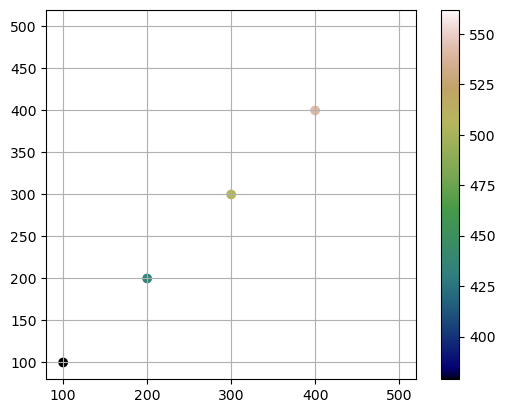

In [9]:
gdf.plot(column='Z', cmap='gist_earth', aspect='equal', legend=True)
plt.grid()

### Sampling Randomly from rasterio object

Sampling interfaces randomly from a raster.

In [10]:
gdf = gg.raster.sample_interfaces(raster=raster, 
                                  random_samples=10,
                                  formation='Test',
                                  crs='EPSG:4326')

gdf

,X,Y,Z,geometry,formation
0,841.88,10.64,259.39,POINT (841.88374 10.64319),Test
1,619.37,613.68,550.50,POINT (619.36922 613.68093),Test
2,71.39,214.63,377.24,POINT (71.39421 214.62971),Test
3,291.52,548.22,580.10,POINT (291.51792 548.21720),Test
4,667.50,777.15,575.51,POINT (667.49607 777.14971),Test
5,388.05,541.58,587.34,POINT (388.04800 541.57883),Test
6,763.22,161.00,297.77,POINT (763.21685 161.00153),Test
7,741.84,345.86,390.45,POINT (741.84238 345.86303),Test
8,185.94,525.62,518.72,POINT (185.94427 525.61736),Test
9,295.81,82.20,431.42,POINT (295.81285 82.19830),Test


### Plotting the data

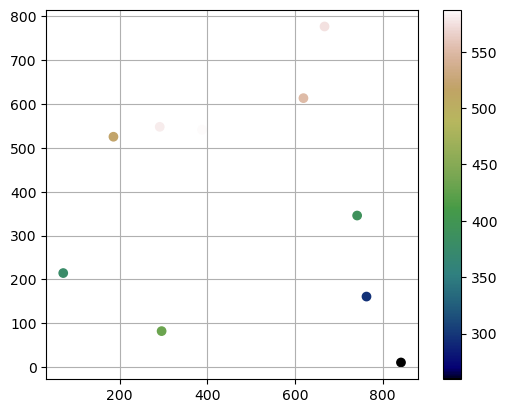

In [11]:
gdf.plot(column='Z', cmap='gist_earth', aspect='equal', legend=True)
plt.grid()

### Sampling Randomly from Array

Sampling interfaces randomly from an array.

In [12]:
gdf = gg.raster.sample_interfaces(raster=raster.read(1), 
                                  random_samples=10,
                                  extent=[0, 972, 0 ,1069],
                                  formation='Test',
                                  crs='EPSG:4326')

gdf

,X,Y,Z,geometry,formation
0,473.53,325.78,515.24,POINT (473.52719 325.78225),Test
1,125.15,1046.41,605.99,POINT (125.15142 1046.41326),Test
2,408.56,363.27,531.36,POINT (408.55717 363.27157),Test
3,89.76,647.61,481.73,POINT (89.75625 647.61335),Test
4,603.34,632.62,563.77,POINT (603.33833 632.61819),Test
5,761.88,120.64,289.86,POINT (761.88473 120.63742),Test
6,121.02,295.96,415.44,POINT (121.01847 295.95861),Test
7,909.44,113.46,294.06,POINT (909.44301 113.46402),Test
8,28.65,557.62,427.19,POINT (28.64604 557.62154),Test
9,555.21,1012.75,704.54,POINT (555.20690 1012.74861),Test


### Plotting the data

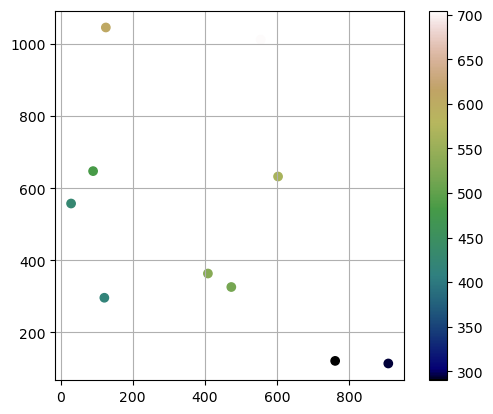

In [13]:
gdf.plot(column='Z', cmap='gist_earth', aspect='equal', legend=True)
plt.grid()

## Sampling Orientations from Raster

### Sampling from lists

Sampling orientations from a raster given lists of X and Y coordinates.

In [14]:
point_x = [100, 200, 300, 400 ,500]
point_y = [100, 200, 300, 400 ,500]

gdf = gg.raster.sample_orientations(raster=raster, 
                                    point_x=point_x,
                                    point_y=point_y,
                                    formation='Test',
                                    crs='EPSG:4326')

gdf

,X,Y,Z,geometry,formation,dip,azimuth,polarity
0,100.00,100.00,376.72,POINT (100.00000 100.00000),Test,23.77,255.93,1
1,200.00,200.00,435.22,POINT (200.00000 200.00000),Test,30.46,239.55,1
2,300.00,300.00,505.29,POINT (300.00000 300.00000),Test,17.34,222.68,1
3,400.00,400.00,540.68,POINT (400.00000 400.00000),Test,15.51,178.84,1
4,500.00,500.00,561.65,POINT (500.00000 500.00000),Test,19.26,145.55,1


### Plotting the data

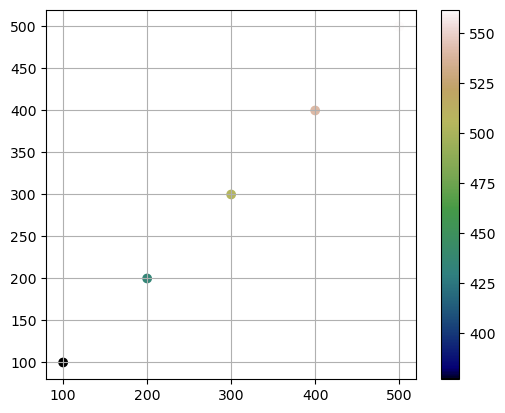

In [15]:
gdf.plot(column='Z', cmap='gist_earth', aspect='equal', legend=True)
plt.grid()

### Sampling from arrays

Sampling orientations from an array given lists of X and Y coordinates.

In [16]:
point_x = [100, 200, 300, 400 ,500]
point_y = [100, 200, 300, 400 ,500]

gdf = gg.raster.sample_orientations(raster=raster.read(1), 
                                    point_x=point_x,
                                    point_y=point_y,
                                    extent=[0, 972, 0 ,1069],
                                    formation='Test',
                                    crs='EPSG:4326')

gdf

,X,Y,Z,geometry,formation,dip,azimuth,polarity
0,100.00,100.00,378.80,POINT (100.00000 100.00000),Test,23.75,255.93,1
1,200.00,200.00,435.22,POINT (200.00000 200.00000),Test,30.44,239.55,1
2,300.00,300.00,505.29,POINT (300.00000 300.00000),Test,17.32,222.68,1
3,400.00,400.00,541.74,POINT (400.00000 400.00000),Test,15.50,178.84,1
4,500.00,500.00,562.02,POINT (500.00000 500.00000),Test,19.24,145.55,1


### Sampling randomly from rasterio object

Sampling orientations randomly from a raster.

In [17]:
gdf = gg.raster.sample_orientations(raster=raster, 
                                    random_samples=10,
                                    formation='Test',
                                    crs='EPSG:4326')

gdf

,X,Y,Z,geometry,formation,dip,azimuth,polarity
0,284.69,278.39,497.54,POINT (284.69186 278.39327),Test,17.39,225.75,1
1,177.98,387.05,478.69,POINT (177.98095 387.04662),Test,35.16,243.36,1
2,934.46,149.71,340.67,POINT (934.46480 149.71324),Test,63.65,257.23,1
3,451.62,149.14,452.48,POINT (451.62399 149.13938),Test,27.60,145.81,1
4,600.63,539.42,540.70,POINT (600.62658 539.42265),Test,25.75,116.19,1
5,72.49,84.01,363.52,POINT (72.49486 84.01418),Test,23.75,257.61,1
6,0.53,529.54,409.50,POINT (0.52880 529.53727),Test,25.15,252.20,1
7,860.95,88.32,273.55,POINT (860.95293 88.32460),Test,17.46,248.87,1
8,425.91,624.04,607.36,POINT (425.90879 624.03964),Test,19.41,146.50,1
9,417.40,874.72,702.71,POINT (417.40366 874.71815),Test,19.04,168.37,1


### Plotting the data

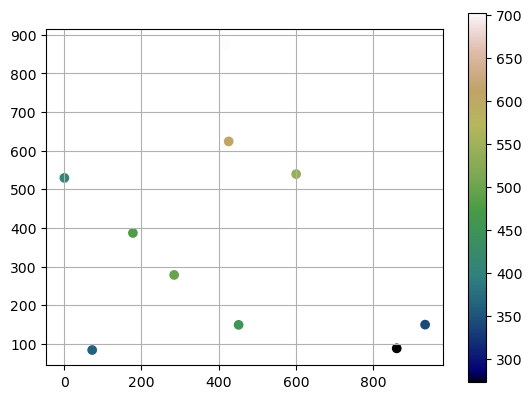

In [18]:
gdf.plot(column='Z', cmap='gist_earth', aspect='equal', legend=True)
plt.grid()

### Sample randomly from array

Sampling orientations randomly from an array.

In [19]:
gdf = gg.raster.sample_orientations(raster=raster.read(1), 
                                    random_samples=10,
                                    extent=[0, 972, 0 ,1069],
                                    formation='Test',
                                    crs='EPSG:4326')

gdf

,X,Y,Z,geometry,formation,dip,azimuth,polarity
0,695.00,188.01,339.22,POINT (694.99797 188.01439),Test,37.73,125.02,1
1,667.19,731.91,558.67,POINT (667.19288 731.91396),Test,37.50,113.11,1
2,693.52,461.77,473.06,POINT (693.51791 461.76906),Test,40.48,114.63,1
3,911.15,931.12,592.98,POINT (911.15457 931.11579),Test,31.47,248.55,1
4,219.07,921.03,664.76,POINT (219.06621 921.03482),Test,43.07,252.62,1
5,870.42,201.06,295.56,POINT (870.42419 201.05543),Test,26.89,209.46,1
6,66.77,241.28,379.12,POINT (66.76695 241.27801),Test,25.53,252.58,1
7,102.62,591.96,479.79,POINT (102.62003 591.96070),Test,34.87,255.12,1
8,420.32,147.15,459.73,POINT (420.32132 147.15141),Test,24.64,158.12,1
9,319.81,396.40,534.57,POINT (319.80835 396.40262),Test,18.03,210.53,1


### Plotting the data

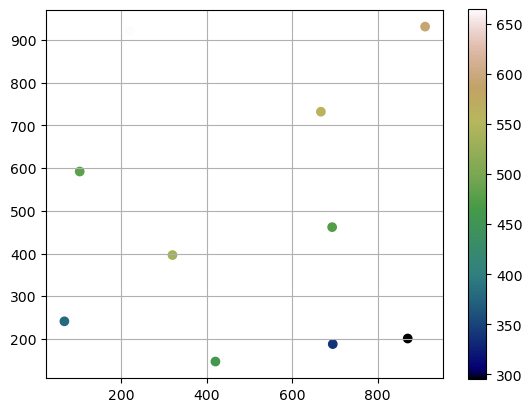

In [20]:
gdf.plot(column='Z', cmap='gist_earth', aspect='equal', legend=True)
plt.grid()